In [22]:
from hossam import *
from pandas import DataFrame, concat
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve

from scipy.spatial import ConvexHull

from 성능평가함수 import *

In [2]:
origin=load_data('pima_indians_diabetes')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

이 데이터 세트는 원래 미국 국립 당뇨병·소화기·신장질환 연구소(National Institute of Diabetes and Digestive and Kidney Diseases)에서 제공한 것입니다. 이 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단 측정값을 기반으로 환자의 당뇨병 여부를 진단적으로 예측하는 것입니다. 더 큰 데이터베이스에서 이러한 사례를 선택하는 데에는 몇 가지 제약 조건이 적용되었습니다. 특히, 여기에 포함된 모든 환자는 21세 이상의 피마 인디언 혈통을 가진 여성입니다. (출처: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

field                     type    description
------------------------  ------  --------------------------------
Pregnancies               연속형  임신횟수
Glucose                   연속형  포도당 부하 검사 수치
BloodPressure             연속형  혈압
SkinThickness             연속형  팔 삼두근 뒤쪽의 피하지방 측정값
Insulin                   연속형  혈청 인슐린
BMI                       연속형  체질량 지수
DiabetesPedigreeFunction  연속형  당뇨 내력 가중치 값
Age                       연속형  나이
Outcome                   명목형  당뇨여부(0 또는 1)


===== 데이터 크기 확인 =====
데이터셋 크기 : (768, 9)
행 개수 : 768개
열 개수 : 9개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colum

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df1=origin.astype({'Outcome':'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [4]:
hs_describe(df1)

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000,5.000,13.500,-6.500,4,0.521,0.902,약한 우측 꼬리,중간
Glucose,768.000,0,0.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000,41.250,202.125,37.125,5,0.651,0.174,거의 대칭,낮음
BloodPressure,768.000,0,0.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000,18.000,107.000,35.000,45,5.859,-1.844,중간 좌측 꼬리,높음
SkinThickness,768.000,0,0.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000,32.000,80.000,-48.000,1,0.130,0.109,거의 대칭,낮음
Insulin,768.000,0,0.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000,127.250,318.125,-190.875,34,4.427,2.272,극단 우측 꼬리,높음
BMI,768.000,0,0.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100,9.300,50.550,13.350,19,2.474,-0.429,거의 대칭,낮음
DiabetesPedigreeFunction,768.000,0,0.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420,0.382,1.200,-0.330,29,3.776,1.920,중간 우측 꼬리,높음
Age,768.000,0,0.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000,17.000,66.500,-1.500,9,1.172,1.130,중간 우측 꼬리,높음


In [5]:
a, b=category_describe(df1)
display(a)
display(b)

,변수,범주,빈도,비율(%)
0,Outcome,0,500,65.100
1,Outcome,1,268,34.900


,최다 범주,최다_비율(%),최소_범주,최소_비율(%)
변수,,,,
Outcome,0,65.100,1,34.900


In [6]:
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df2=df1.copy()
df2[zero_features]=df2[zero_features].replace(0, np.nan)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [7]:
imr=SimpleImputer(missing_values=np.nan, strategy='median')
df_imr=imr.fit_transform(df2.values)
df3=DataFrame(df_imr, index=df2.index, columns=df2.columns)
df3=df3.astype({'Outcome':'category'})
desc=hs_describe(df3)
desc

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000,5.000,13.500,-6.500,4,0.521,0.902,약한 우측 꼬리,중간
Glucose,768.000,0,0.000,121.656,30.438,44.000,99.750,117.000,140.250,199.000,40.500,201.000,39.000,0,0.000,0.536,약한 우측 꼬리,중간
BloodPressure,768.000,0,0.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000,16.000,104.000,40.000,14,1.823,0.142,거의 대칭,낮음
SkinThickness,768.000,0,0.000,29.108,8.791,7.000,25.000,29.000,32.000,99.000,7.000,42.500,14.500,87,11.328,0.838,약한 우측 꼬리,중간
Insulin,768.000,0,0.000,140.672,86.383,14.000,121.500,125.000,127.250,846.000,5.750,135.875,112.875,346,45.052,3.380,극단 우측 꼬리,높음
BMI,768.000,0,0.000,32.455,6.875,18.200,27.500,32.300,36.600,67.100,9.100,50.250,13.850,8,1.042,0.599,약한 우측 꼬리,중간
DiabetesPedigreeFunction,768.000,0,0.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420,0.382,1.200,-0.330,29,3.776,1.920,중간 우측 꼬리,높음
Age,768.000,0,0.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000,17.000,66.500,-1.500,9,1.172,1.130,중간 우측 꼬리,높음


In [8]:
log_fields=desc[desc['log_need']!='낮음'].index.tolist()
df4=df3.copy()
for f in log_fields:
    df4[f]=np.log1p(df4[f])
hs_describe(df4)

,count,na_count,na_rate,mean,std,min,25%,50%,75%,max,iqr,up,down,outlier_count,outlier_rate,skew,dist,log_need
Pregnancies,768.000,0,0.000,1.311,0.770,0.000,0.693,1.386,1.946,2.890,1.253,3.825,-1.186,0,0.000,-0.243,거의 대칭,낮음
Glucose,768.000,0,0.000,4.779,0.248,3.807,4.613,4.771,4.951,5.298,0.338,5.457,4.106,4,0.521,-0.058,거의 대칭,낮음
BloodPressure,768.000,0,0.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000,16.000,104.000,40.000,14,1.823,0.142,거의 대칭,낮음
SkinThickness,768.000,0,0.000,3.359,0.314,2.079,3.258,3.401,3.497,4.605,0.238,3.854,2.900,96,12.500,-0.859,약한 좌측 꼬리,중간
Insulin,768.000,0,0.000,4.827,0.495,2.708,4.808,4.836,4.854,6.742,0.046,4.923,4.739,346,45.052,-0.175,거의 대칭,낮음
BMI,768.000,0,0.000,3.489,0.204,2.955,3.350,3.506,3.627,4.221,0.277,4.043,2.934,3,0.391,-0.038,거의 대칭,낮음
DiabetesPedigreeFunction,768.000,0,0.000,0.365,0.199,0.075,0.218,0.317,0.486,1.230,0.268,0.888,-0.184,13,1.693,1.118,중간 우측 꼬리,높음
Age,768.000,0,0.000,3.482,0.313,3.091,3.219,3.401,3.738,4.407,0.519,4.516,2.441,0,0.000,0.615,약한 우측 꼬리,중간


In [9]:
df=df4.copy()
df['Outcome']=df['Outcome'].astype('int')

yname='Outcome'
x=df.drop(columns=[yname])
y=df[yname]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=52)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [10]:
pipe=Pipeline([
    ('VIF_Selector', VIFSelector()),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=52))
])

param_grid={
    'model__penalty':['l2'],
    'model__solver':['lbfgs'],
    'model__C':[0.01, 0.1, 1, 10, 100],
    'model__max_iter':[100, 300, 500],
    'model__class_weight':[None, 'balanced']
}

gs=GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

gs.fit(x_train, y_train)

estimator=gs.best_estimator_
estimator

Pipeline(steps=[('VIF_Selector', VIFSelector()), ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=52))])

In [23]:
log_loss_test=-log_loss(y_test, y_pred_proba, normalize=False)
log_loss_test

-77.18386940419566

In [24]:
y_null=np.ones_like(y_test)*y_test.mean()
log_loss_null=-log_loss(y_test, y_null, normalize=False)
log_loss_null

-99.76854365841893

In [25]:
pseudo_r2=1-(log_loss_test/log_loss_null)
pseudo_r2

0.22637069186403302

In [11]:
r2=estimator.score(x_test, y_test)
r2

0.7662337662337663

In [12]:
y_pred_proba=estimator.predict_proba(x_test)
y_pred_proba[:5]

array([[0.17157015, 0.82842985],
       [0.95274504, 0.04725496],
       [0.41211228, 0.58788772],
       [0.35137747, 0.64862253],
       [0.98235443, 0.01764557]])

In [13]:
y_pred_proba_1=estimator.predict_proba(x_test)[:,1]
y_pred_proba_1[:5]

array([0.82842985, 0.04725496, 0.58788772, 0.64862253, 0.01764557])

In [14]:
y_pred=estimator.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [28]:
cm=confusion_matrix(y_test, y_pred)

((TN, FP), (FN, TP))=cm
print(TN, TP, FN, FP)

cmdf=DataFrame(cm, index=['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'], columns=['Predicted (Negative)', 'Predicted (Positive)'])
cmdf

74 44 10 26


,Predicted (Negative),Predicted (Positive)
Actual 0 (TN/FP),74,26
Actual 1 (FN/TP),10,44


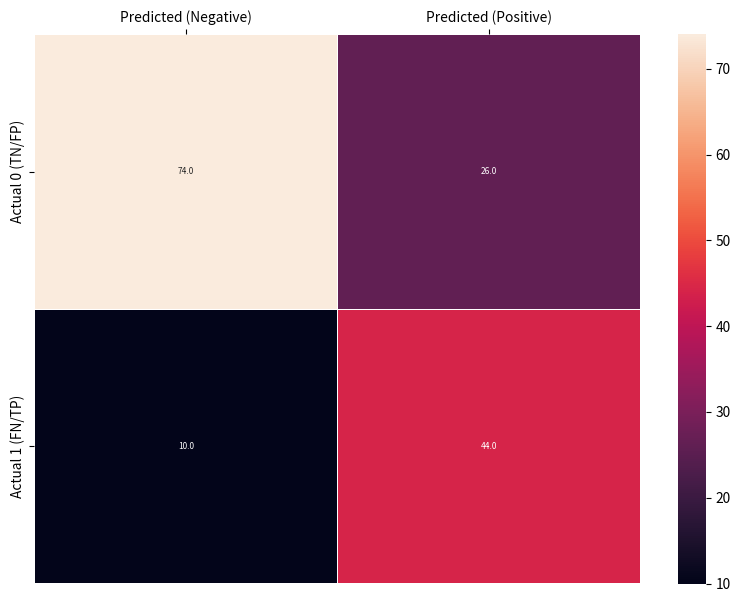

In [16]:
width_px=800
height_px=600
rows=1
cols=1
figsize=(width_px/100, height_px/100)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=100)

sb.heatmap(data=cmdf, annot=True, fmt='0.1f', linewidth=0.5)

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()
plt.close()

In [17]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7662337662337663

In [18]:
precision=precision_score(y_test, y_pred)
precision

0.6285714285714286

In [19]:
tpr=recall_score(y_test, y_pred)
tpr

0.8148148148148148

In [29]:
fpr=FP/(TN+FP)
fpr

0.26

In [30]:
tnr=1-(FP/(TN+FP))
tnr

0.74

In [20]:
f1=f1_score(y_test, y_pred)
f1

0.7096774193548387

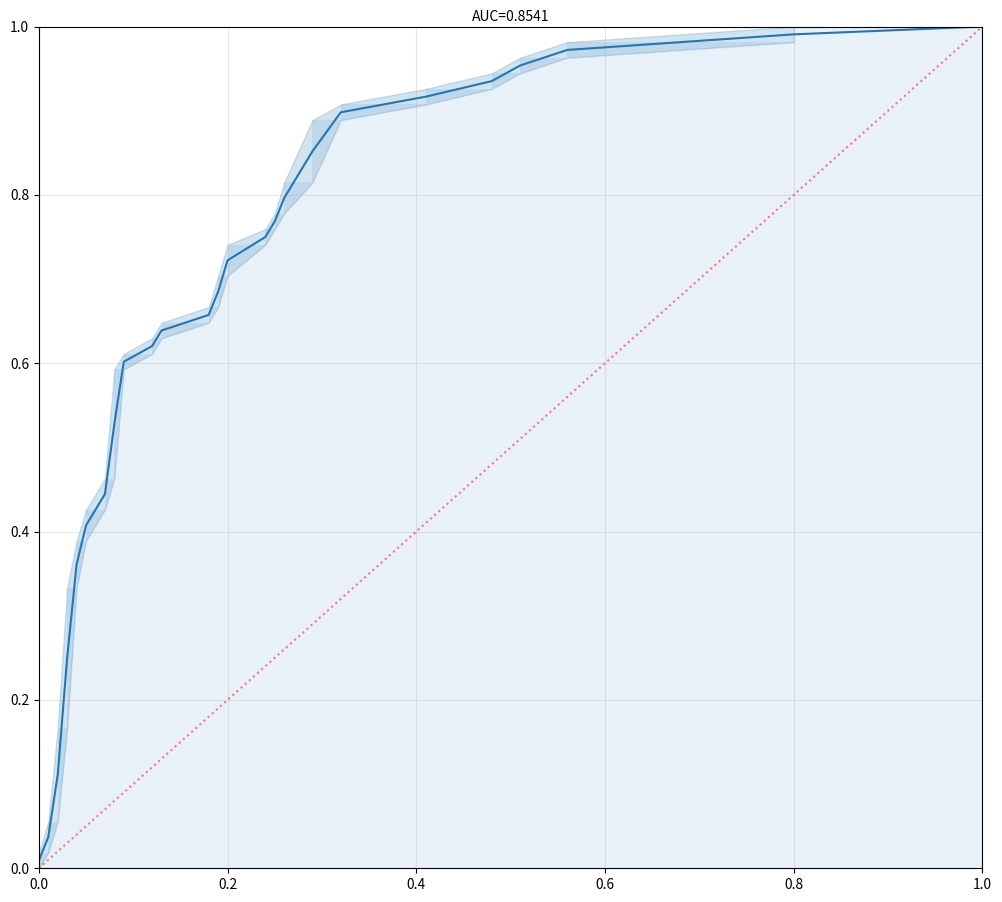

In [21]:
auc=roc_auc_score(y_test, y_pred_proba_1)

roc_fpr, roc_tpr, thresholds=roc_curve(y_test, y_pred_proba_1)

width_px=1000
height_px=900
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.fill_between(x=roc_fpr, y1=roc_tpr, alpha=0.1)

ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={auc:.4f}', fontsize=10, pad=4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.tight_layout()
plt.show()
plt.close()

In [31]:
if hasattr(estimator, 'named_steps'):
    classname=estimator.named_steps['model'].__class__.__name__
else:
    classname=estimator.__class__.__name__

score_df=DataFrame({
    '의사결정계수(R2)':[pseudo_r2],
    '정확도(Accuracy)':[accuracy],
    '정밀도(Precision)':[precision],
    '재현율(Recall)':[tpr],
    '위양성율(Fallout)':[fpr],
    '특이성(TNR)':[tnr],
    'F1 Score':[f1],
    'AUC':[auc]
}, index=[classname])

score_df

,의사결정계수(R2),정확도(Accuracy),정밀도(Precision),재현율(Recall),위양성율(Fallout),특이성(TNR),F1 Score,AUC
LogisticRegression,0.226,0.766,0.629,0.815,0.260,0.740,0.710,0.854


In [32]:
is_classification=hasattr(estimator, '_estimator_type') and estimator._estimator_type=='classifier'
is_classification

True

In [33]:
if hasattr(estimator, 'named_steps'):
    classname=estimator.named_steps['model'].__class__.__name__
else:
    classname=estimator.__class__.__name__

classname

'LogisticRegression'

In [34]:
scoring='roc_auc'
cv=5
train_sizes=np.linspace(0.1, 1.0, 10)
n_jobs=-1

scoring, cv, train_sizes

('roc_auc', 5, array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [35]:
train_sizes, train_scores, cv_scores=learning_curve(
    estimator=estimator,
    X=x,
    y=y,
    train_sizes=train_sizes,
    cv=cv,
    scoring=scoring,
    n_jobs=n_jobs,
    shuffle=False,
    random_state=52
)

train_sizes, train_scores, cv_scores

(array([ 61, 122, 184, 245, 307, 368, 429, 491, 552, 614]),
 array([[0.93076923, 0.81699346, 0.81699346, 0.81699346, 0.81699346],
        [0.87694444, 0.85396825, 0.85396825, 0.85396825, 0.85396825],
        [0.82097342, 0.82133754, 0.84427083, 0.84427083, 0.84427083],
        [0.84375871, 0.84856506, 0.84238596, 0.84238596, 0.84238596],
        [0.83959833, 0.84755176, 0.82426019, 0.82068873, 0.82068873],
        [0.83768997, 0.84146537, 0.82086066, 0.82178898, 0.82178898],
        [0.84894099, 0.8508226 , 0.83470835, 0.83046655, 0.83163453],
        [0.85955514, 0.86203892, 0.84752549, 0.83255711, 0.82683101],
        [0.852362  , 0.8551314 , 0.84055563, 0.82948532, 0.83546649],
        [0.85432243, 0.85734813, 0.84440421, 0.83408521, 0.84886682]]),
 array([[0.75592593, 0.75814815, 0.8412963 , 0.82377358, 0.80358491],
        [0.75703704, 0.75777778, 0.83777778, 0.85660377, 0.82358491],
        [0.79185185, 0.78388889, 0.84037037, 0.88396226, 0.83301887],
        [0.80018519, 0.78592

In [37]:
train_metric=train_scores
cv_metric=cv_scores

train_mean=train_metric.mean(axis=1)
cv_mean=cv_metric.mean(axis=1)
cv_std=cv_metric.std(axis=1)

final_train=train_mean[-1]
final_cv=cv_mean[-1]
final_std=cv_std[-1]

gap_ratio=final_train-final_cv
var_ratio=final_std

if final_train<0.6 and final_cv<0.6:
    status='⚠️과소적합'
elif gap_ratio>0.1:
    status='⚠️과대적합'
elif gap_ratio<=0.05 and var_ratio<=0.05:
    status='✅일반화 양호'
elif var_ratio>0.1:
    status='⚠️데이터 부족'
else:
    status='⚠️판단유보'

metric_name=scoring.upper()

result_df=DataFrame({
    f'Train {metric_name}':[final_train],
    f'CV {metric_name} 평균':[final_cv],
    f'CV {metric_name} 표준편차':[final_std],
    f'Train/CV 비율':[gap_ratio],
    f'CV 변동성 비율':[var_ratio],
    '판정 결과':[status]
}, index=[classname])

result_df

,Train ROC_AUC,CV ROC_AUC 평균,CV ROC_AUC 표준편차,Train/CV 비율,CV 변동성 비율,판정 결과
LogisticRegression,0.848,0.839,0.030,0.009,0.030,✅일반화 양호


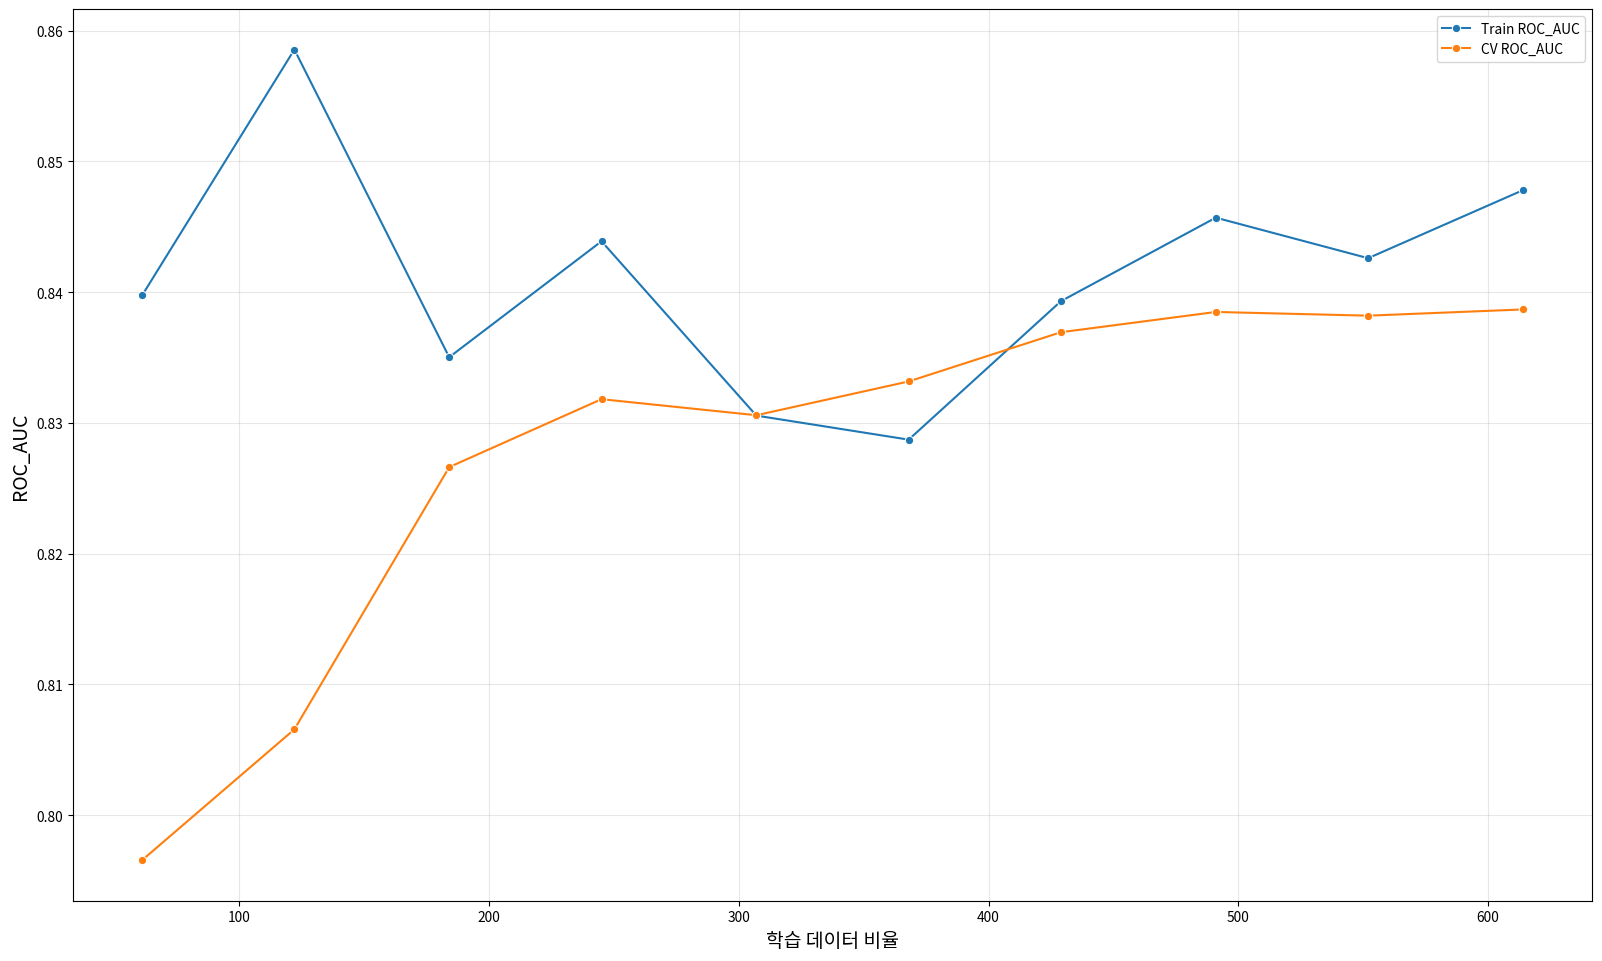

In [39]:
figsize=(1600/my_dpi, 960/my_dpi)
fig, ax=plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=train_sizes, y=train_mean, marker='o', markeredgecolor='#ffffff', label=f'Train {metric_name}')
sb.lineplot(x=train_sizes, y=cv_mean, marker='o', markeredgecolor='#ffffff', label=f'CV {metric_name}')

ax.set_xlabel('학습 데이터 비율')
ax.set_ylabel(metric_name)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
try:
    open(GetCompasData('SBJ_2601_001', '4', '04._성연령별_유동인구.csv'))